In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

## BREAKFAST

In [0]:
breakfast=pd.read_csv("breakfast.csv")
breakfast['date']=pd.to_datetime(breakfast['date'])


# dropping the na values of wastage
train=breakfast[~(breakfast['wastage'].isna())].copy()
target=train['wastage']
train.drop(columns=['breakfast','wastage','attendance'],inplace=True)

# sunday goes to zero and monday goes to 1...
train['weekday']=train['date'].dt.weekday
# train['is_weakend']

# exam days 
exam_days={'2018-11-22':1,
           '2018-11-23':1,
           '2018-11-26':1,
           '2018-11-27':1,
           '2018-11-28':1,
           '2018-11-29':1,
           '2018-11-30':1,
           '2018-12-01':1,
           '2018-12-03':1,
           '2018-12-04':1,
           '2018-12-05':1}

number_of_student_having_exam={'2018-11-22':320,
                              '2018-11-23':68,
                              '2018-11-26':436,
                              '2018-11-27':210,
                              '2018-11-28':437,
                              '2018-11-29':384,
                              '2018-11-30':405,
                              '2018-12-01':37,
                              '2018-12-03':279,
                              '2018-12-04':125}

train['is_exam']=train['date'].astype(str).map(exam_days)
train['is_exam'].fillna(0,inplace=True)
train['is_exam']=train["is_exam"].astype(int)

train['no_students_exam']=train['date'].astype(str).map(number_of_student_having_exam)
train['no_students_exam'].fillna(0,inplace=True)

# is bakery (on wed and saturaday)
bakery={0:0,1:0,2:0,3:1,4:0,5:0,6:1}
train['is_bakery']=train['weekday'].map(bakery)

# is week end
# students go outside and eat.
weekend={0:1,1:0,2:0,3:0,4:0,5:0,6:1}
train['is_weekend']=train['weekday'].map(weekend)

print(train.shape)
train.head()

In [0]:
train['p1']=train['temperature']*train['humidity']
train['p2']=train['is_weekend']*train['is_exam']

train.drop(columns=['date'],inplace=True)
train.head()

### Plot of fetaure vs target value

##### 1. Temperature vs Wastage

/home/amit/Documents/installation/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


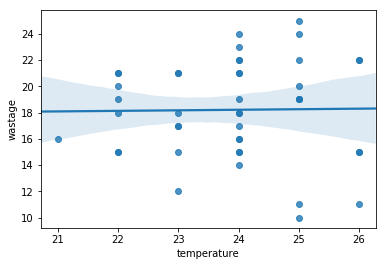

In [0]:
sns.regplot(train['temperature'], target)

##### 2. Humidity vs Wastage

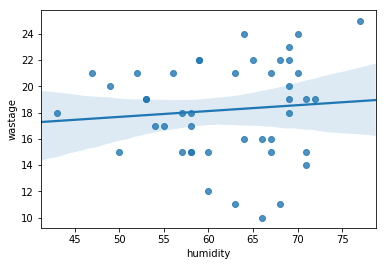

In [0]:
sns.regplot(x = train['humidity'], y = target)

##### 3. Weekday vs Wastage

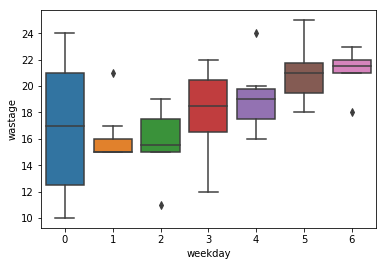

In [0]:
sns.boxplot(x = train['weekday'], y = target)

##### 4. is_exam vs Wastage

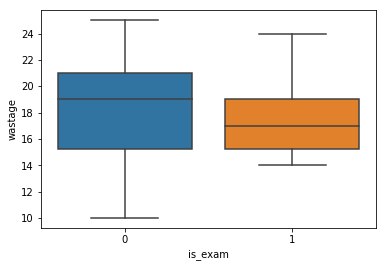

In [0]:
sns.boxplot(x = train['is_exam'], y = target)

> Less Wastage of beakfast when there is an exam.

##### 5. Number of Student giving exam vs Wastage

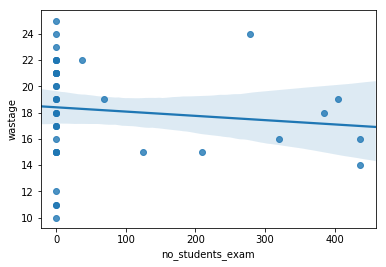

In [0]:
sns.regplot(x = train['no_students_exam'], y = target)

##### 6. is_bakery vs Wastage

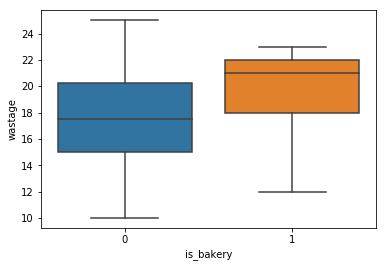

In [0]:
sns.boxplot(x = train['is_bakery'], y = target)

> More Wastage of breakfast when bakery comes in afternoon. 

##### 7. is_weekend vs Wastage

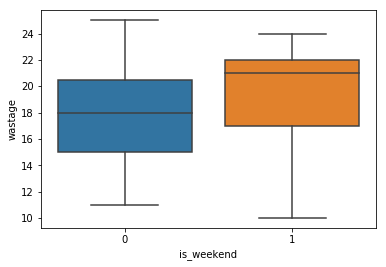

In [0]:
sns.boxplot(x = train['is_weekend'], y = target)

> More Wastage of breakfast on weekend

## TARGET DISTRIBUTION

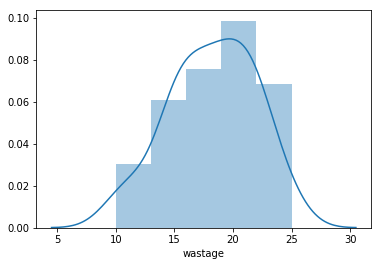

In [0]:
sns.distplot(target)

##### Prediction

In [0]:
X=train.iloc[:,:]
y=target.values

print(X.shape,y.shape)

(44, 9) (44,)


In [0]:
lr=LinearRegression()
lr.fit(X,y)
print("The R2 score is",lr.score(X,y))
print("The mse is",mean_squared_error(lr.predict(X),y))

The R2 score is 0.3459186987644093
The mse is 8.668942204754144


---

## LUNCH

In [0]:
lunch=pd.read_csv("lunch.csv")
lunch['date']=pd.to_datetime(lunch['date'])


# dropping the na values of wastage
train=lunch[~(lunch['wastage'].isna())].copy()
target=train['wastage']
train.drop(columns=['lunch','wastage','attendance'],inplace=True)

# sunday goes to zero and monday goes to 1...
train['weekday']=train['date'].dt.weekday
# train['is_weakend']

# exam days 
exam_days={'2018-11-22':1,
           '2018-11-23':1,
           '2018-11-26':1,
           '2018-11-27':1,
           '2018-11-28':1,
           '2018-11-29':1,
           '2018-11-30':1,
           '2018-12-01':1,
           '2018-12-03':1,
           '2018-12-04':1,
           '2018-12-05':1}

number_of_student_having_exam={'2018-11-22':320,
                              '2018-11-23':68,
                              '2018-11-26':436,
                              '2018-11-27':210,
                              '2018-11-28':437,
                              '2018-11-29':384,
                              '2018-11-30':405,
                              '2018-12-01':37,
                              '2018-12-03':279,
                              '2018-12-04':125}

train['is_exam']=train['date'].astype(str).map(exam_days)
train['is_exam'].fillna(0,inplace=True)
train['is_exam']=train["is_exam"].astype(int)

train['no_students_exam']=train['date'].astype(str).map(number_of_student_having_exam)
train['no_students_exam'].fillna(0,inplace=True)

# is bakery (on wed and saturaday)
bakery={0:0,1:0,2:0,3:1,4:0,5:0,6:1}
train['is_bakery']=train['weekday'].map(bakery)

# is week end
# students go outside and eat.
weekend={0:1,1:0,2:0,3:0,4:0,5:0,6:1}
train['is_weekend']=train['weekday'].map(weekend)

print(train.shape)
train.head()

(45, 8)


,date,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend
0,2018-10-22,31,46,0,0,0.0,0,1
1,2018-10-23,32,38,1,0,0.0,0,0
2,2018-10-24,32,32,2,0,0.0,0,0
3,2018-10-25,32,39,3,0,0.0,1,0
4,2018-10-26,31,42,4,0,0.0,0,0


In [0]:
train['p1']=train['temperature']*train['humidity']
train['p2']=train['is_weekend']*train['is_exam']

train.drop(columns=['date'],inplace=True)
train.head()

,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend,p1,p2
0,31,46,0,0,0.0,0,1,1426,0
1,32,38,1,0,0.0,0,0,1216,0
2,32,32,2,0,0.0,0,0,1024,0
3,32,39,3,0,0.0,1,0,1248,0
4,31,42,4,0,0.0,0,0,1302,0


### Plot of feature vs target

##### 1. Temperature vs Wastage

/home/amit/Documents/installation/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


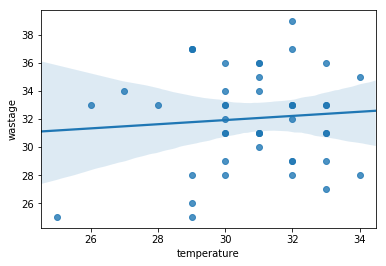

In [0]:
sns.regplot(x = train['temperature'], y = target)

##### 2.  Humdity vs Wastage

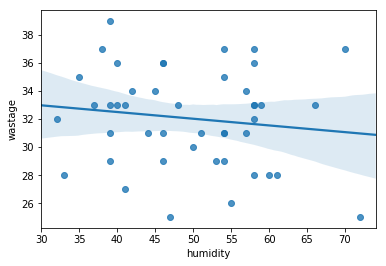

In [0]:
sns.regplot(train['humidity'], target)

##### 3. Weekday vs Wastage

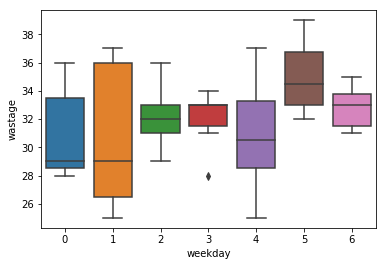

In [0]:
sns.boxplot(x = train['weekday'], y = target)

> Encoding= 0:Sunday, 1: Monday, 2: Tuesday...... 6: Friday

##### 4. is_exam vs Wastage

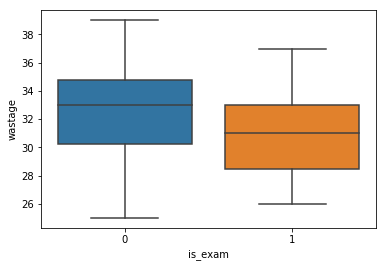

In [0]:
sns.boxplot(x = train['is_exam'], y = target)

> Less Wastage of Lunch if there is an exam

##### 5. Number of students giving exam vs Wastage

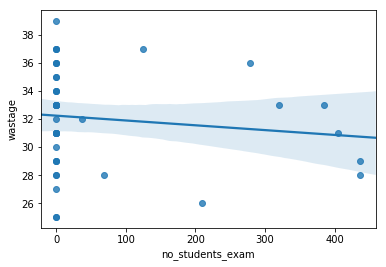

In [0]:
sns.regplot(x = train['no_students_exam'], y = target)

##### 6. is_bakery vs Wastage

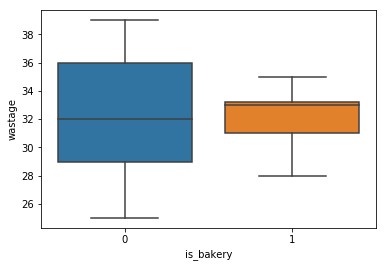

In [0]:
sns.boxplot(x = train['is_bakery'], y = target)

> More Wastage of Lunch if bakery comes in afternoon.

##### 7. is_weekend vs Wastage

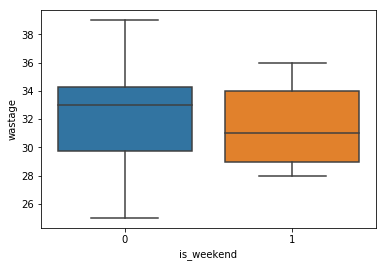

In [0]:
sns.boxplot(x = train['is_weekend'], y = target)

> Less Wastage of Lunch on weekend

## TARGET DISTRIBUTION

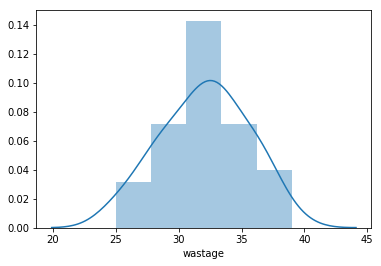

In [0]:
sns.distplot(target)

#### Prediction

In [0]:
X=train.iloc[:,:]
y=target.values
print(X.shape,y.shape)

(45, 9) (45,)


In [0]:
lr=LinearRegression()
lr.fit(X,y)
print("The R2 score is",lr.score(X,y))
print("The mse is",mean_squared_error(lr.predict(X),y))

The R2 score is 0.16089745914554188
The mse is 9.73193198741126


---

## DINNER

In [0]:
dinner=pd.read_csv("dinner.csv")
dinner['date']=pd.to_datetime(dinner['date'])


# dropping the na values of wastage
train=dinner[~(dinner['wastage'].isna())].copy()
target=train['wastage']
train.drop(columns=['dinner','wastage','attendance'],inplace=True)

# sunday goes to zero and monday goes to 1...
train['weekday']=train['date'].dt.weekday
# train['is_weakend']

# exam days 
exam_days={'2018-11-22':1,
           '2018-11-23':1,
           '2018-11-26':1,
           '2018-11-27':1,
           '2018-11-28':1,
           '2018-11-29':1,
           '2018-11-30':1,
           '2018-12-01':1,
           '2018-12-03':1,
           '2018-12-04':1,
           '2018-12-05':1}

number_of_student_having_exam={'2018-11-22':320,
                              '2018-11-23':68,
                              '2018-11-26':436,
                              '2018-11-27':210,
                              '2018-11-28':437,
                              '2018-11-29':384,
                              '2018-11-30':405,
                              '2018-12-01':37,
                              '2018-12-03':279,
                              '2018-12-04':125}

train['is_exam']=train['date'].astype(str).map(exam_days)
train['is_exam'].fillna(0,inplace=True)
train['is_exam']=train["is_exam"].astype(int)

train['no_students_exam']=train['date'].astype(str).map(number_of_student_having_exam)
train['no_students_exam'].fillna(0,inplace=True)

# is bakery (on wed and saturaday)
bakery={0:0,1:0,2:0,3:1,4:0,5:0,6:1}
train['is_bakery']=train['weekday'].map(bakery)

# is week end
# students go outside and eat.
weekend={0:1,1:0,2:0,3:0,4:0,5:0,6:1}
train['is_weekend']=train['weekday'].map(weekend)

print(train.shape)
train.head()

(45, 8)


,date,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend
0,2018-10-22,28,81,0,0,0.0,0,1
1,2018-10-23,27,68,1,0,0.0,0,0
2,2018-10-24,27,61,2,0,0.0,0,0
3,2018-10-25,28,56,3,0,0.0,1,0
4,2018-10-26,28,60,4,0,0.0,0,0


In [0]:
train['p1']=train['temperature']*train['humidity']
train['p2']=train['is_weekend']*train['is_exam']

train.drop(columns=['date'],inplace=True)
train.head()

,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend,p1,p2
0,28,81,0,0,0.0,0,1,2268,0
1,27,68,1,0,0.0,0,0,1836,0
2,27,61,2,0,0.0,0,0,1647,0
3,28,56,3,0,0.0,1,0,1568,0
4,28,60,4,0,0.0,0,0,1680,0


### Plot of Feature vs Wastage

##### 1. Temperature vs Wastage

/home/amit/Documents/installation/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


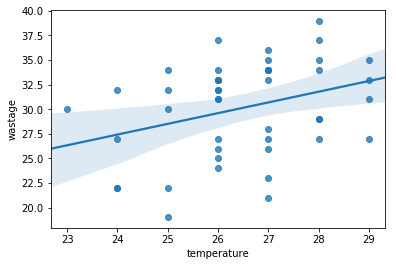

In [0]:
sns.regplot(x = train['temperature'], y = target)

##### 2. Humidity vs Wastage

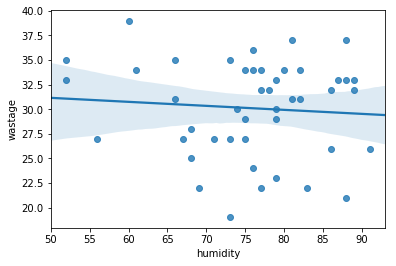

In [0]:
sns.regplot(x = train['humidity'], y = target)

##### 3. weekday vs Wastage

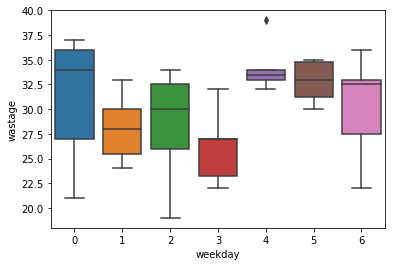

In [0]:
sns.boxplot(x = train['weekday'], y = target)

##### 4. is_exam vs Wastage

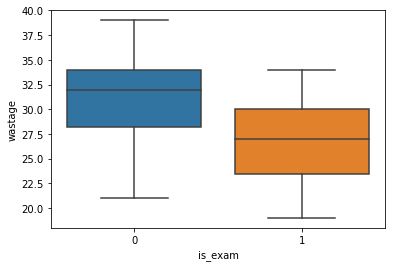

In [0]:
sns.boxplot(x = train['is_exam'], y = target)

> Less Wastage of dinner when there is an exam.

##### 5. Number of Students giving exam vs Wastage

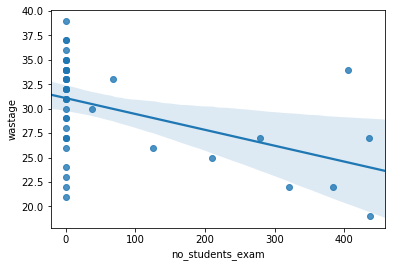

In [0]:
sns.regplot(x = train['no_students_exam'], y = target)

##### 6. is_bakery vs Wastage

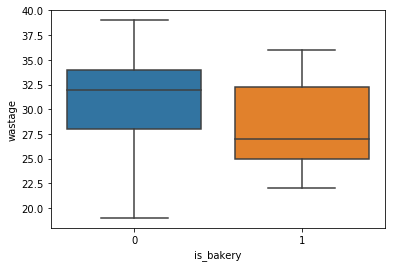

In [0]:
sns.boxplot(x = train['is_bakery'], y = target)

> Less Wastage of dinner when bakery comes in afternoon. This maybe because of the reason that most people don't eat lunch because of bakery and hence they are most probably to be hungry in dinner.

##### 7. is_weekend vs Wastage

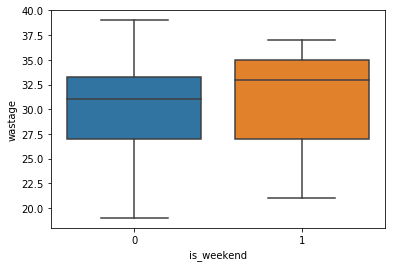

In [0]:
sns.boxplot(x = train['is_weekend'], y = target)

## TARGET DISTRIBUTION

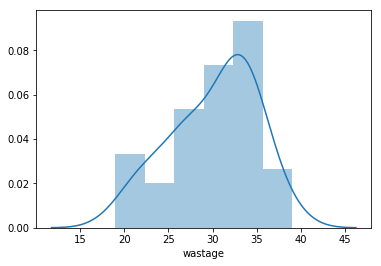

In [0]:
sns.distplot(target)

##### Prediction

In [0]:
X=train.iloc[:,:]
y=target.values
print(X.shape,y.shape)

(45, 9) (45,)


In [0]:
lr=LinearRegression()
lr.fit(X,y)
print("The R2 score is",lr.score(X,y))
print("The mse is",mean_squared_error(lr.predict(X),y))

The R2 score is 0.42709832757397437
The mse is 13.195127902197449
